# W2 Practicals - Supervised Learning
### (k-NN and Decision Trees)

### Aims:
* To apply k-NN and decision trees as examples of supervised learning models for classification and regression problems.
* To get some insight into the trained models, including the influence of a hyperparameter in an ML model.
* To produce some assessable work for this subject.



In [82]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Q1 Make scatterplots of each dataset so you can see what they look like.

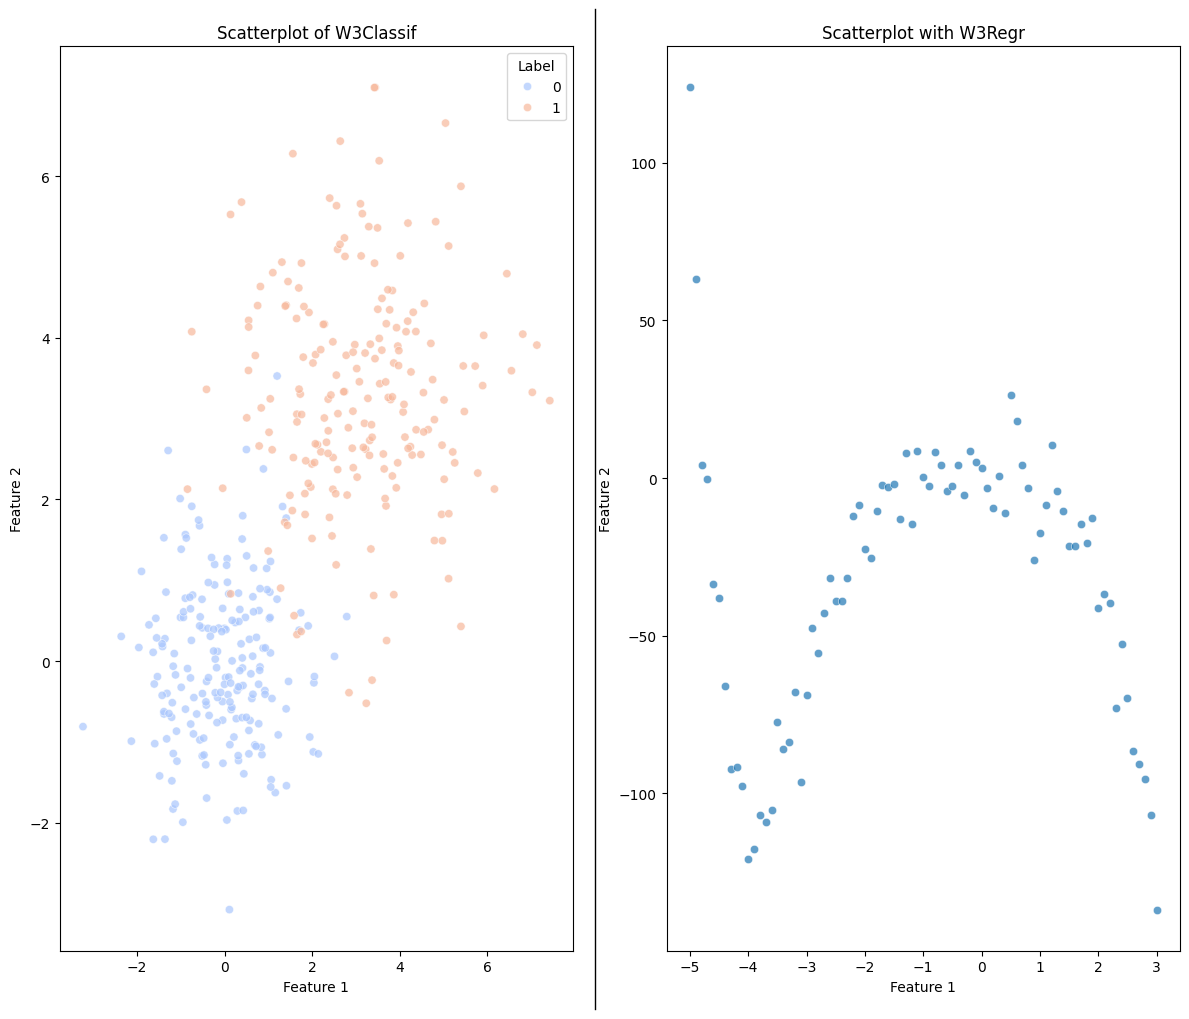

In [133]:
# Sub-Plot Setup
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
fig.subplots_adjust(wspace=15)
fig.lines.append(plt.Line2D([0.5, 0.5], [0, 1], transform=fig.transFigure, color='black', linewidth=1))

# 1st Sub-Plot for W3Classif
CSV_FILE_1 = 'w3classif.csv'
df1 = pd.read_csv(CSV_FILE_1, header=None)
df1.columns = ["Feature1", "Feature2", "Label"]

sns.scatterplot(x=df1["Feature1"],
                y=df1["Feature2"],
                hue=df1["Label"],
                palette="coolwarm",
                alpha=0.7,
                ax=axes[0])
axes[0].set_title("Scatterplot of W3Classif")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# 2nd Sub-Plot for W3Regr
CSV_FILE_2 = 'w3regr.csv'
df2 = pd.read_csv(CSV_FILE_2, header=None)
df2.columns = ["Feature1", "Feature2"]

sns.scatterplot(x=df2["Feature1"],
                y=df2["Feature2"],
                alpha=0.7,
                ax=axes[1])
axes[1].set_title("Scatterplot with W3Regr")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
plt.tight_layout()
# plt.save